## Libraries

In [18]:
import os
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd

from glob import glob
import librosa
import librosa.display
import IPython.display as ipd

from itertools import cycle

sns.set_theme(style='white', palette=None)
color_pal = plt.rcParams['axes.prop_cycle'].by_key()['color']
color_cycle = cycle(plt.rcParams['axes.prop_cycle'].by_key()['color'])

## Config

In [19]:
DATASET_PATH = 'C:/Users/Tajr/Desktop/UDSM/Experiments/datasets/capuchinbird/'
POSITIVE_PATH = os.path.join(DATASET_PATH, os.listdir(DATASET_PATH)[1])
NEGATIVE_PATH =  os.path.join(DATASET_PATH, os.listdir(DATASET_PATH)[2])
FOREST_PATH = os.path.join(DATASET_PATH, os.listdir(DATASET_PATH)[0])
POS_SAMPLE_FILE = os.path.join(POSITIVE_PATH, os.listdir(POSITIVE_PATH)[0])
NEG_SAMPLE_FILE = os.path.join(NEGATIVE_PATH, os.listdir(NEGATIVE_PATH)[0])
AMPLITUDE_RATE_OUT = 16000

## Helpers

In [20]:
# data loading function
def load_wav_16k_mono(path):
    # load encoded wav file
    byte_encoded_string = tf.io.read_file(path)
    
    # decode wave
    wav, sample_rate = tf.audio.decode_wav(byte_encoded_string, desired_channels=1)
    
    # remove trailing axis
    wav = tf.squeeze(wav, axis=-1)
    
    # change amplitude of the audio signal from 44100Hz to 16000Hz
    wav = tfio.audio.resample(wav, rate_in=sample_rate, rate_out=AMPLITUDE_RATE_OUT)
    
    # return
    return wav

## Dataset

### Raw Data

In [21]:
audio_files = glob(os.path.join(POSITIVE_PATH, '*.wav'))
audio_files

['C:/Users/Tajr/Desktop/UDSM/Experiments/datasets/capuchinbird/Parsed_Capuchinbird_Clips\\XC114131-0.wav',
 'C:/Users/Tajr/Desktop/UDSM/Experiments/datasets/capuchinbird/Parsed_Capuchinbird_Clips\\XC114131-1.wav',
 'C:/Users/Tajr/Desktop/UDSM/Experiments/datasets/capuchinbird/Parsed_Capuchinbird_Clips\\XC114131-2.wav',
 'C:/Users/Tajr/Desktop/UDSM/Experiments/datasets/capuchinbird/Parsed_Capuchinbird_Clips\\XC114131-3.wav',
 'C:/Users/Tajr/Desktop/UDSM/Experiments/datasets/capuchinbird/Parsed_Capuchinbird_Clips\\XC114131-4.wav',
 'C:/Users/Tajr/Desktop/UDSM/Experiments/datasets/capuchinbird/Parsed_Capuchinbird_Clips\\XC114132-0.wav',
 'C:/Users/Tajr/Desktop/UDSM/Experiments/datasets/capuchinbird/Parsed_Capuchinbird_Clips\\XC114132-1.wav',
 'C:/Users/Tajr/Desktop/UDSM/Experiments/datasets/capuchinbird/Parsed_Capuchinbird_Clips\\XC114132-2.wav',
 'C:/Users/Tajr/Desktop/UDSM/Experiments/datasets/capuchinbird/Parsed_Capuchinbird_Clips\\XC114132-3.wav',
 'C:/Users/Tajr/Desktop/UDSM/Experime

In [22]:
# play audion file
ipd.Audio(audio_files[0])

In [23]:
raw_data, sample_rate = librosa.load(audio_files[0])

In [24]:
raw_data

array([ 0.00062825,  0.00665833,  0.00634747, ..., -0.00800139,
       -0.00788705, -0.00413157], dtype=float32)

In [25]:
sample_rate

22050

### EDA

<AxesSubplot:title={'center':'Raw Audio File'}>

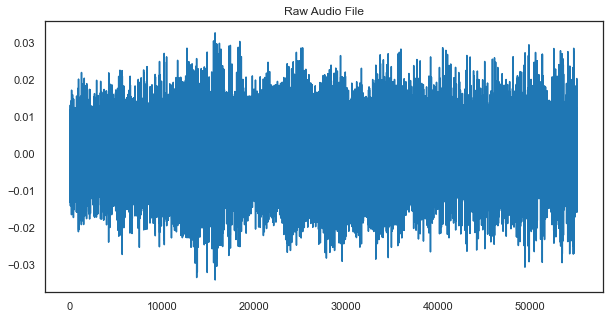

In [29]:
# Plot raw data
pd.Series(raw_data).plot(figsize=(10, 5), lw=1, title='Raw Audio File', color=color_pal[0])

In [53]:
# trimmed_raw_data, _ = librosa.effects.trim(raw_data)

<AxesSubplot:title={'center':'Zoomed in Raw Audio File'}>

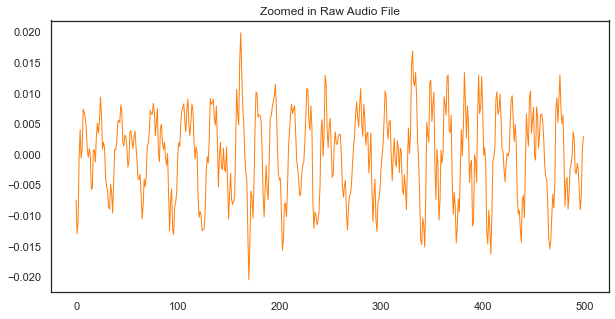

In [57]:
# zoomed in
pd.Series(raw_data[20000:20500]).plot(figsize=(10, 5), lw=1, title='Zoomed in Raw Audio File', color=color_pal[1])

In [58]:
# fourier transform data
transformed = librosa.stft(raw_data)
transformed

array([[ 3.7988614e-02+0.0000000e+00j, -1.2328405e-02+0.0000000e+00j,
        -4.8450667e-02+0.0000000e+00j, ...,
        -3.1513192e-02+0.0000000e+00j, -8.5080095e-02+0.0000000e+00j,
        -9.5914565e-03+0.0000000e+00j],
       [-4.3362413e-02+1.8023543e-02j,  1.2180706e-02-6.8445332e-02j,
         4.0093742e-02+3.1340737e-02j, ...,
         3.0659089e-02-4.5766670e-02j,  7.2083041e-02-8.2663530e-03j,
         6.0386804e-04+8.2169302e-02j],
       [ 1.6689106e-03-4.3958653e-02j, -6.9160154e-03+9.5648304e-02j,
         9.9171530e-03-6.4212978e-02j, ...,
         3.9350156e-02-5.2998032e-02j, -5.8710381e-02-1.8108629e-02j,
        -4.6235729e-02-4.4471644e-02j],
       ...,
       [-6.3568755e-04+1.5784866e-05j,  3.1455050e-04-7.9142774e-06j,
        -4.9606388e-07+5.1448745e-07j, ...,
         2.8675547e-07+1.4893001e-07j, -6.7750763e-05+1.1811252e-04j,
         7.5601373e-04-1.3149193e-03j],
       [ 6.3549745e-04-8.3247733e-06j, -4.6989112e-06-3.1383327e-04j,
        -3.3376895e-07

In [60]:
transformed = librosa.amplitude_to_db(np.abs(transformed), ref=np.max)
transformed

array([[-43.767162, -53.542095, -41.65424 , ..., -45.39039 , -36.763676,
        -55.722546],
       [-41.92586 , -38.517944, -41.227657, ..., -40.539265, -38.14683 ,
        -37.065807],
       [-42.49309 , -35.72404 , -39.105404, ..., -38.968132, -39.59126 ,
        -39.216038],
       ...,
       [-79.29269 , -80.      , -80.      , ..., -80.      , -80.      ,
        -71.74188 ],
       [-79.29721 , -80.      , -80.      , ..., -80.      , -80.      ,
        -71.74459 ],
       [-79.30372 , -80.      , -80.      , ..., -80.      , -80.      ,
        -71.74779 ]], dtype=float32)

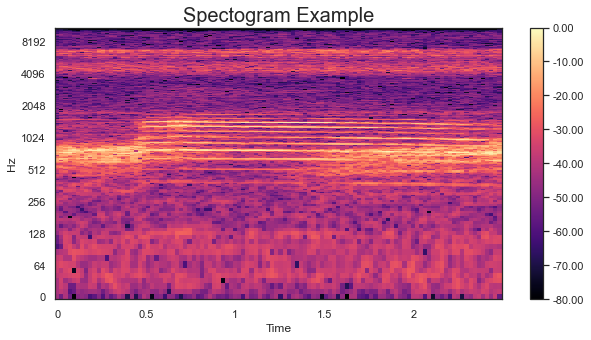

In [63]:
fig, ax = plt.subplots(figsize=(10, 5))
audio_spectogram = librosa.display.specshow(transformed, x_axis='time', y_axis='log', ax=ax)
ax.set_title('Spectogram Example', fontsize=20)
fig.colorbar(audio_spectogram, ax=ax, format=f'%0.2f')
plt.show()

In [64]:
sound = librosa.feature.melspectrogram(raw_data, sr=sample_rate, n_mels=256)

C:\Users\Tajr\AppData\Local\Temp\ipykernel_29000\2605591178.py:1: FutureWarning: Pass y=[ 0.00062825  0.00665833  0.00634747 ... -0.00800139 -0.00788705
 -0.00413157] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  sound = librosa.feature.melspectrogram(raw_data, sr=sample_rate, n_mels=256)


In [65]:
sound_mel = librosa.amplitude_to_db(sound, ref=np.max)

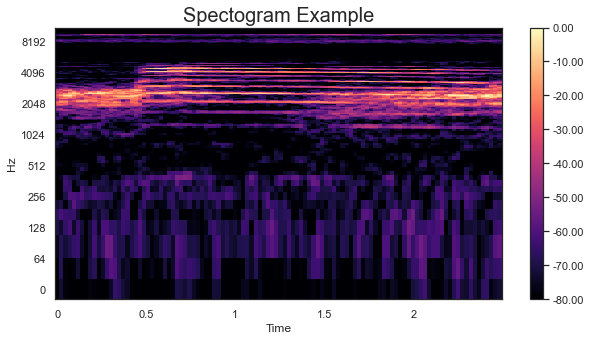

In [66]:
fig, ax = plt.subplots(figsize=(10, 5))
audio_spectogram = librosa.display.specshow(sound_mel, x_axis='time', y_axis='log', ax=ax)
ax.set_title('Mel Spectogram Example', fontsize=20)
fig.colorbar(audio_spectogram, ax=ax, format=f'%0.2f')
plt.show()

### Processing

### Splitting

## Model

## Training

## Evaluation

## Vizualization

## Save